In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


df = pd.read_csv('breast-cancer.data')

df.head()
print(df.columns)


Index(['no-recurrence-events', '30-39', 'premeno', '30-34', '0-2', 'no', '3',
       'left', 'left_low', 'no.1'],
      dtype='object')


In [2]:
df.info()

# I pulled up the attribute information to see correct column names and named the columns accordingly
column_names = [
    "Class",        
    "age",
    "menopause",
    "tumor_size",
    "inv_nodes",
    "node_caps",
    "deg_malig",
    "breast",
    "breast_quad",
    "irradiat"
]

df.columns = column_names
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   no-recurrence-events  285 non-null    object
 1   30-39                 285 non-null    object
 2   premeno               285 non-null    object
 3   30-34                 285 non-null    object
 4   0-2                   285 non-null    object
 5   no                    285 non-null    object
 6   3                     285 non-null    int64 
 7   left                  285 non-null    object
 8   left_low              285 non-null    object
 9   no.1                  285 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.4+ KB
                  Class    age menopause tumor_size inv_nodes node_caps  \
0  no-recurrence-events  40-49   premeno      20-24       0-2        no   
1  no-recurrence-events  40-49   premeno      20-24       0-2        no   
2  no-recurrence-ev

In [13]:
#RangeIndex: 285, 0 to 284
#looks like all of our columns have entries

#but lot's of categorical data, we need to covert to numerical, #just wanted a visual
df_new = pd.get_dummies(df)
df_new.head()

,deg_malig,Class_no-recurrence-events,Class_recurrence-events,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_ge40,...,breast_left,breast_right,breast_quad_?,breast_quad_central,breast_quad_left_low,breast_quad_left_up,breast_quad_right_low,breast_quad_right_up,irradiat_no,irradiat_yes
0,2,True,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
1,2,True,False,False,False,True,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
2,2,True,False,False,False,False,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False
3,2,True,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False
4,2,True,False,False,False,False,False,True,False,True,...,True,False,False,False,True,False,False,False,True,False


In [14]:
#let's drop the target column 'Class' and first categorical columns to avoid duplicates (like no recurrence and recurrence)
df_kmeans = pd.get_dummies(df.drop(columns=['Class']), drop_first=True)
#if we leave class it will distort the clustering, the algorithm will cheat and separate clusters based on label and mess up distance
df_kmeans.head()


,deg_malig,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_lt40,menopause_premeno,tumor_size_10-14,tumor_size_15-19,...,inv_nodes_9-11,node_caps_no,node_caps_yes,breast_right,breast_quad_central,breast_quad_left_low,breast_quad_left_up,breast_quad_right_low,breast_quad_right_up,irradiat_yes
0,2,False,True,False,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,True,False
1,2,False,True,False,False,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
2,2,False,False,False,True,False,False,False,False,True,...,False,True,False,True,False,False,True,False,False,False
3,2,False,True,False,False,False,False,True,False,False,...,False,True,False,True,False,False,False,True,False,False
4,2,False,False,False,True,False,False,False,False,True,...,False,True,False,False,False,True,False,False,False,False


In [51]:
#standardization
#most of the values will be 1 or 0 due to True/False except first column deg-malig (0-3) This can mess things up so let's standardize.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #creates scaler itself
scaled_df_kmeans = scaler.fit_transform(df_kmeans) #implements scaler on our data




In [56]:
#PART A create K-Means cluster model using scikit learn
#see organizing categorical data and standardization above
from sklearn.cluster import KMeans 
kmeans_model = KMeans(n_clusters=3, random_state=42) #I randomly picked 3. #Random state makes it reproducible.
clusters = kmeans_model.fit_predict(scaled_df_kmeans) #use our scaled dataframe

print("first 10 cluster sample was assigned to:") 
print(clusters[:10]) #shows which cluster each sample was assigned to. 
print("How many samples are in each cluster:")
print(pd.Series(clusters).value_counts())

first 10 cluster sample was assigned to:
[0 2 2 2 2 2 2 2 2 2]
How many samples are in each cluster:
2    165
1     61
0     59
Name: count, dtype: int64


K=2, SSD=8675.175096613202
K=3, SSD=8410.810879390116
K=4, SSD=7984.921698256036
K=5, SSD=7737.306404122178
K=6, SSD=7570.679212526978
K=7, SSD=7348.933721303688
K=8, SSD=7015.604875111889
K=9, SSD=6819.729147651685
K=10, SSD=6620.142607665404


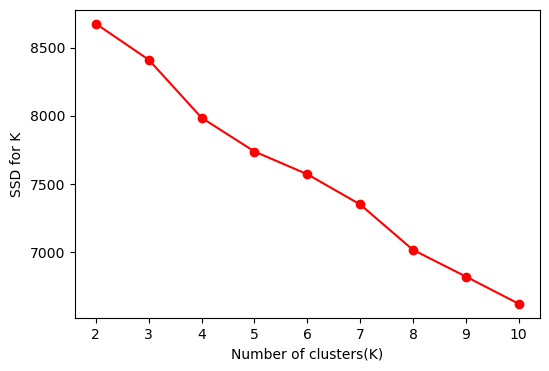

In [57]:
#So now going to use elbow method to find optimal number of K(clusters)
#Let's take possible values of K.  Let's pick 2-11. 
#Calculate SSD for every value of K. As K decreases, SSD decreases. 
#But optimal value for visualization is where steep drop or the elbow is.
ssd = [] #empty list
for k in range (2, 11): #set min and max value for K and run the loop for each
    kmeans_model = KMeans(n_clusters=k, random_state=42) #creates KMeans clustering model in each loop
    kmeans_model.fit(scaled_df_kmeans) #used standardized dataset (standardizes features with mean and SD) 
    ssd.append(kmeans_model.inertia_) #add its calculated SSD, inertia means SSD
    print(f"K={k}, SSD={kmeans_model.inertia_}")

#and we visualize with the plot
plt.figure(figsize=(6, 4))
plt.plot(range(2, 11), ssd, color="red", marker="o")
plt.xlabel("Number of clusters(K)")
plt.ylabel("SSD for K")
plt.show()

#I picked 3 randomly but the elbow also shows 3 is optimal choice due to no significant drop off after 3


In [44]:
#PART C 2D VISUALIZATION OF CLUSTERS USING PCA, and PLOT CENTROIDS
from sklearn.decomposition import PCA 

#since I chose 3 clusters and elbow method confirmed that 3 is best for SSD and variability.
#Can use df_kmeans from above. 



In [25]:
df_kmeans.shape #285 rows, 33 different attributes before PCA


(285, 33)

In [26]:
#just showing visualization 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_kmeans)

X_pca.shape

(285, 2)

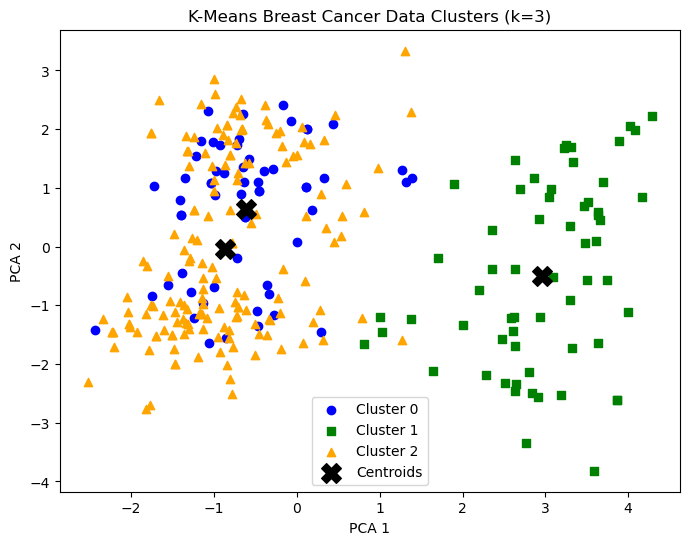

In [58]:

#Now let's use our data
# 1. Convert to array for PCA (no need to refit KMeans)

# 3. Transform existing cluster centroids to 2D
kmeans_model = KMeans(n_clusters=3, random_state=42)
clusters = kmeans_model.fit_predict(scaled_df_kmeans)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_df_kmeans)

centers_pca = pca.transform(kmeans_model.cluster_centers_) #centroids in the 2D PCA 
#sci-kit learn stores the coordinates of the cluster centroid in the cluster_centers_attribute

# 4. Plot
#create figure. Can pick size. 
plt.figure(figsize=(8,6))

#manually plotted since I know I set to 3 clusters using elbow method. 
plt.scatter(X_pca[clusters == 0, 0], X_pca[clusters == 0, 1],
            color='blue', marker='o', label='Cluster 0')
plt.scatter(X_pca[clusters == 1, 0], X_pca[clusters == 1, 1],
            color='green', marker='s', label='Cluster 1')
plt.scatter(X_pca[clusters == 2, 0], X_pca[clusters == 2, 1],
            color='orange', marker='^', label='Cluster 2')
    

# Plot centroids
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], #x (PC1) and y coordinates (PC2) of centroids.
            s=200, c='black', marker='X', label='Centroids') #size, color, marker X, and label 


plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title(f'K-Means Breast Cancer Data Clusters (k={kmeans_model.n_clusters})')
plt.legend()
plt.show()

#Cluster 0 and 2 are quite intermingled while Cluster 1 seems more separated.  I am going to look at key features of clusters with ML model for last assignment. 


In [60]:
#visualizing likness of 'Clusters' to 'Class'
df["Cluster"] = clusters
pd.crosstab(df["Cluster"], df["Class"])

Class,no-recurrence-events,recurrence-events
Cluster,,
0,41,18
1,29,32
2,130,35
